<a href="https://colab.research.google.com/github/heisarafat/Co2-Emission/blob/main/Co2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import shap


In [ ]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [ ]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
#Drop unnecessary ID-like columns (Make, Model) for numerical modeling
df_clean = df.drop(['Make', 'Model'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle Class                     7385 non-null   object 
 1   Engine Size(L)                    7385 non-null   float64
 2   Cylinders                         7385 non-null   int64  
 3   Transmission                      7385 non-null   object 
 4   Fuel Type                         7385 non-null   object 
 5   Fuel Consumption City (L/100 km)  7385 non-null   float64
 6   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 9   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 577.1+ KB


In [ ]:
df.columns


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

## 1) Determine/Test the importance of different variables on the emission of Co2
## 2) What are the most influencing features that affect the CO2 emission the most?

In [ ]:
#Encode categorical variable
df_encoded = pd.get_dummies(df_clean, drop_first=True)

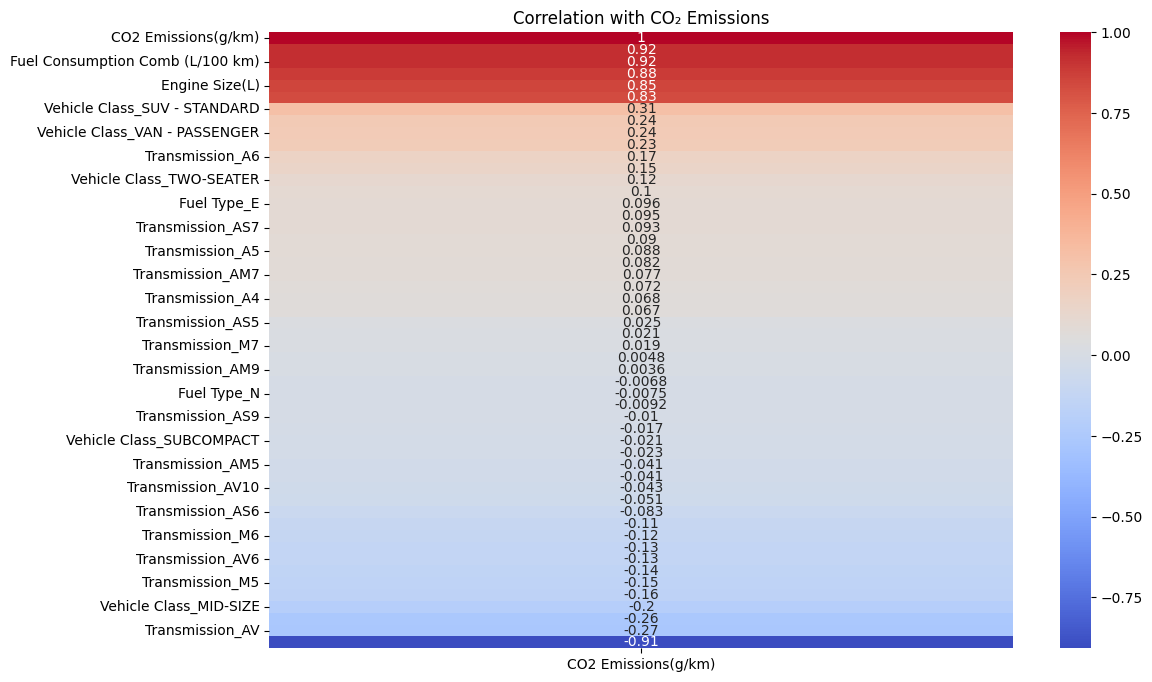

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr()[['CO2 Emissions(g/km)']].sort_values(by='CO2 Emissions(g/km)', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with CO₂ Emissions")
plt.show()


##Prepare data for modeling

In [ ]:
#Target and feature split
X = df_encoded.drop('CO2 Emissions(g/km)', axis=1)
y = df_encoded['CO2 Emissions(g/km)']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Standardize features for regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9904674887950905


In [ ]:
#Show coefficients ranked by absolute value
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_,
    'Abs_Coefficient': np.abs(lr.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

coef_df.head(10)


,Feature,Coefficient,Abs_Coefficient
47,Fuel Type_E,-30.124665,30.124665
2,Fuel Consumption City (L/100 km),24.300747,24.300747
4,Fuel Consumption Comb (L/100 km),21.801822,21.801822
50,Fuel Type_Z,-15.104861,15.104861
49,Fuel Type_X,-14.953004,14.953004
3,Fuel Consumption Hwy (L/100 km),12.900662,12.900662
5,Fuel Consumption Comb (mpg),-5.703786,5.703786
1,Cylinders,1.900033,1.900033
23,Transmission_A6,-1.131224,1.131224
35,Transmission_AS6,-1.073770,1.073770


In [ ]:
#Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

importances.head(10)

,Feature,Importance
4,Fuel Consumption Comb (L/100 km),0.804106
5,Fuel Consumption Comb (mpg),0.119071
47,Fuel Type_E,0.048448
2,Fuel Consumption City (L/100 km),0.012454
0,Engine Size(L),0.008054
3,Fuel Consumption Hwy (L/100 km),0.001517
1,Cylinders,0.001233
11,Vehicle Class_PICKUP TRUCK - STANDARD,0.001208
10,Vehicle Class_PICKUP TRUCK - SMALL,0.000825
49,Fuel Type_X,0.000805


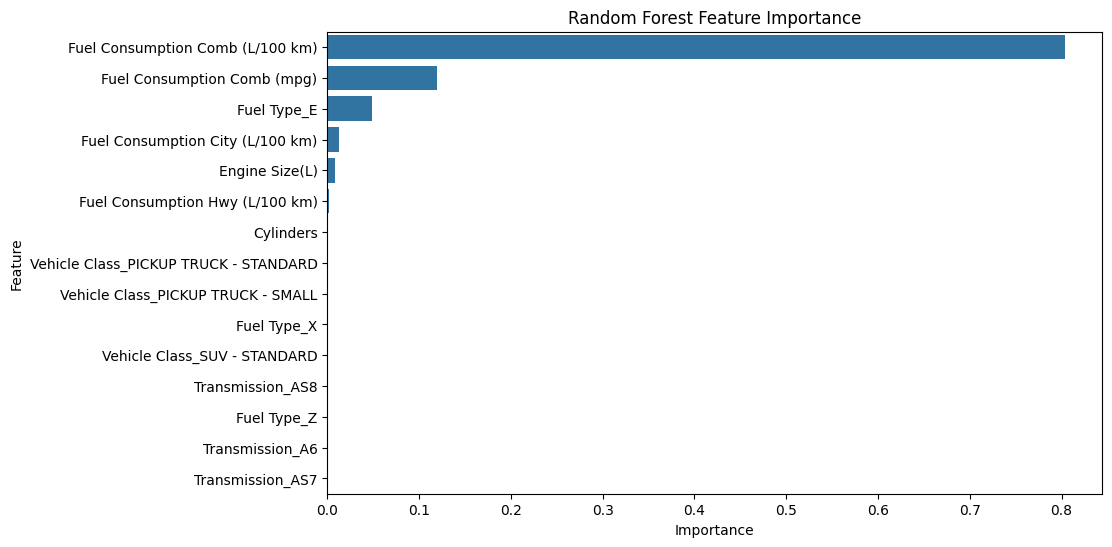

In [ ]:
#Plot importance
plt.figure(figsize=(10,6))
sns.barplot(data=importances.head(15), x='Importance', y='Feature')
plt.title("Random Forest Feature Importance")
plt.show()


# Answer to Q1:

### I tested variable influence using: Pearson correlation, Multiple Linear Regression, Random Forest

# - All three methods consistently show that fuel consumption metrics, engine size, cylinders, and fuel type are the dominant factors influencing CO₂ emissions.

# Answer to Q2:
## Top 3 most influential features:

# Fuel Consumption Combined (L/100 km) — by far the strongest predictor, Fuel Consumption City / Highway, Engine Size (L)

# - The most influential variable controlling CO₂ emissions is fuel consumption (especially combined L/100 km), followed by engine size, city/highway fuel usage, fuel type, and cylinders.